<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import os
import re

from functools import reduce
from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_order_payments_dataset.csv',
 'groceries.csv',
 'mock_sales_data.csv',
 'online_retail_II.xlsx',
 'online_retail.xlsx',
 'ecommerce-data.csv',
 '1_customers_dataset.csv',
 'sample-sales-data.csv',
 'sales_data_with_stores.csv',
 '1_orders_dataset.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales.csv',
 'test.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [4]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.columns = [re.sub(' ', '_', re.sub(' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


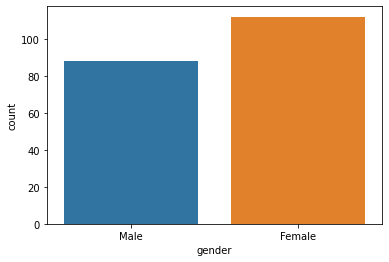

In [6]:
sns.countplot(data = df, x = 'gender')

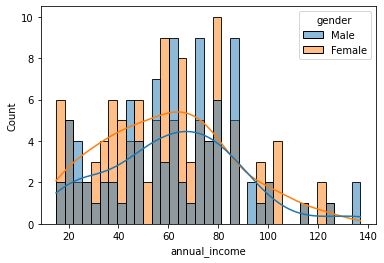

In [7]:
sns.histplot(data = df, x = 'annual_income', hue = 'gender', kde = True, bins = 35)

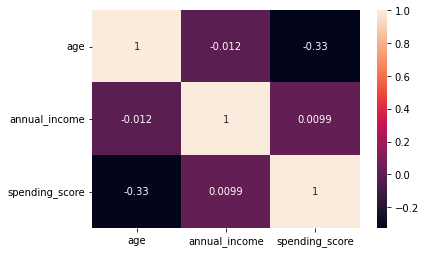

In [8]:
sns.heatmap(data = df.drop('customerid', axis = 1).corr(), annot = True)

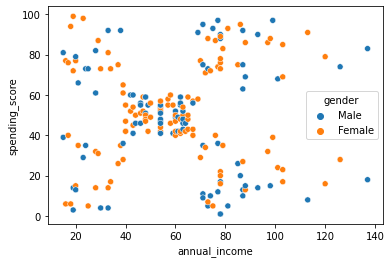

In [9]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

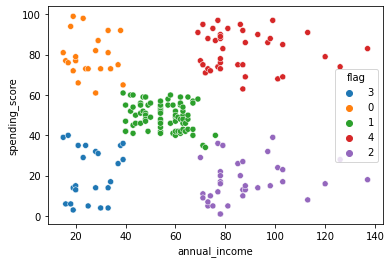

In [14]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])
km = KMeans(n_clusters=5, random_state = 10)
km.fit(df_std)
df['flag'] = km.fit_predict(df_std).astype(str)
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'flag')


# Iterator

In [15]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}

arr = np.empty([3, 3], dtype = 'object')

for k, v in a.items() :
  arr[v[0], v[1]] = k

arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [19]:
from string import ascii_lowercase as lt

In [23]:
pool = list(lt) + list(range(10))

In [34]:
names = ['kim', 'lee', 'yoo']

email1 = [''.join(np.random.choice(pool, 10, replace = True)) for a in range(3)]
email2 = [''.join(np.random.choice(pool, 5, replace = True)) for a in range(3)]
email3 = np.random.choice(['.com', '.net', '.io', '.net', 'co.kr'], 3 , replace = True)

age = np.random.randint(20, 40 , 3)

email = [a + '@' + b for a, b in zip(email1, email2)]
email = [a + b for a, b in zip(email, email3)]

a = [{'names' : names, 'email2' : email, 'age' : age }]
a

[{'names': ['kim', 'lee', 'yoo'],
  'email2': ['t3a1c82atj@0yyku.net',
   '3cit1j0rmd@vv8dlco.kr',
   'nmn45i9gn9@7615oco.kr'],
  'age': array([31, 32, 38])}]

In [38]:
print(names)
print(email)
print(age)


['kim', 'lee', 'yoo']
['t3a1c82atj@0yyku.net', '3cit1j0rmd@vv8dlco.kr', 'nmn45i9gn9@7615oco.kr']
[31 32 38]
